## CDMs - Análisis global

En esta notebook hacemos una primera revisión de los datos de entrenamiento

### Carga de librerías y setup

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_columns', None)

### Carga de datos crudos

In [3]:
data = pd.read_csv('./train_data/train_data.csv')

In [4]:
data.head()

,event_id,time_to_tca,mission_id,risk,max_risk_estimate,max_risk_scaling,miss_distance,relative_speed,relative_position_r,relative_position_t,relative_position_n,relative_velocity_r,relative_velocity_t,relative_velocity_n,t_time_lastob_start,t_time_lastob_end,t_recommended_od_span,t_actual_od_span,t_obs_available,t_obs_used,t_residuals_accepted,t_weighted_rms,t_rcs_estimate,t_cd_area_over_mass,t_cr_area_over_mass,t_sedr,t_j2k_sma,t_j2k_ecc,t_j2k_inc,t_ct_r,t_cn_r,t_cn_t,t_crdot_r,t_crdot_t,t_crdot_n,t_ctdot_r,t_ctdot_t,t_ctdot_n,t_ctdot_rdot,t_cndot_r,t_cndot_t,t_cndot_n,t_cndot_rdot,t_cndot_tdot,c_object_type,c_time_lastob_start,c_time_lastob_end,c_recommended_od_span,c_actual_od_span,c_obs_available,c_obs_used,c_residuals_accepted,c_weighted_rms,c_rcs_estimate,c_cd_area_over_mass,c_cr_area_over_mass,c_sedr,c_j2k_sma,c_j2k_ecc,c_j2k_inc,c_ct_r,c_cn_r,c_cn_t,c_crdot_r,c_crdot_t,c_crdot_n,c_ctdot_r,c_ctdot_t,c_ctdot_n,c_ctdot_rdot,c_cndot_r,c_cndot_t,c_cndot_n,c_cndot_rdot,c_cndot_tdot,t_span,c_span,t_h_apo,t_h_per,c_h_apo,c_h_per,geocentric_latitude,azimuth,elevation,mahalanobis_distance,t_position_covariance_det,c_position_covariance_det,t_sigma_r,c_sigma_r,t_sigma_t,c_sigma_t,t_sigma_n,c_sigma_n,t_sigma_rdot,c_sigma_rdot,t_sigma_tdot,c_sigma_tdot,t_sigma_ndot,c_sigma_ndot,F10,F3M,SSN,AP
0,0,1.566798,5,-10.204955,-7.834756,8.602101,14923.0,13792.0,453.8,5976.6,-13666.8,-7.2,-12637.0,-5525.9,1.0,0.0,3.78,3.78,459,458,98.9,1.265,0.402,0.013826,0.007173,0.000051,6996.918867,0.003997,97.806412,-0.397969,0.292258,0.040799,0.394221,-0.999674,-0.038498,-0.981098,0.214612,-0.316493,-0.210247,0.170737,-0.001551,0.531593,0.002117,-0.179278,UNKNOWN,180.0,2.0,15.85,15.85,15.0,15.0,100.0,2.36,NaN,0.348701,0.126607,0.001406,7006.607320,0.003144,74.045735,-0.824859,0.473976,-0.002576,0.825216,-0.999998,0.003565,-0.732954,0.220006,-0.814249,-0.220621,0.249855,0.196620,0.722186,-0.196908,-0.668487,1.0,2.0,646.745439,590.818294,650.497251,606.443389,-73.574095,-23.618769,0.029910,129.430951,737347.125225,4.429923e+16,4.057932,266.722309,137.617114,54366.864909,1.781418,46.612573,0.147350,58.272095,0.004092,0.165044,0.002987,0.386462,89.0,83.0,42.0,11.0
1,0,1.207494,5,-10.355758,-7.848937,8.956374,14544.0,13792.0,474.3,5821.2,-13319.8,-7.0,-12637.0,-5525.9,1.0,0.0,3.79,3.79,456,455,98.5,1.270,0.402,0.013487,0.009139,0.000060,6996.920255,0.003996,97.806420,-0.073137,0.297366,0.060541,0.069652,-0.998192,-0.052511,-0.994240,-0.029644,-0.302333,0.034030,0.179696,0.001552,0.561142,-0.005165,-0.181036,UNKNOWN,180.0,2.0,15.85,15.85,15.0,15.0,100.0,2.36,NaN,0.348701,0.126607,0.001406,7006.621053,0.003144,74.045736,-0.818207,0.482754,-0.003578,0.818573,-0.999998,0.004574,-0.728759,0.202595,-0.817490,-0.203216,0.258964,0.195718,0.721903,-0.196008,-0.674979,1.0,2.0,646.743506,590.823004,650.513314,606.454793,-73.570690,-23.618769,0.029079,271.540424,114138.993569,4.378610e+16,3.526780,262.191819,56.070117,54082.067268,1.800959,46.595869,0.059672,57.966413,0.003753,0.164383,0.002933,0.386393,89.0,83.0,42.0,11.0
2,0,0.952193,5,-10.345631,-7.847406,8.932195,14475.0,13792.0,474.6,5796.2,-13256.1,-7.0,-12637.0,-5525.9,1.0,0.0,3.79,3.80,456,455,98.5,1.257,0.402,0.013357,0.007057,0.000060,6996.920553,0.003996,97.806418,-0.109230,0.305189,0.043711,0.107079,-0.996235,-0.034287,-0.996674,0.033933,-0.308501,-0.030161,0.123760,0.019630,0.579274,-0.023726,-0.125737,UNKNOWN,180.0,2.0,15.85,15.85,15.0,15.0,100.0,2.36,NaN,0.348701,0.126607,0.001406,7006.623524,0.003144,74.045737,-0.817408,0.483828,-0.003742,0.817774,-0.999998,0.004738,-0.729083,0.201698,-0.817662,-0.202320,0.260092,0.195558,0.721854,-0.195849,-0.675347,1.0,2.0,646.745607,590.821499,650.515082,606.457965,-73.570088,-23.618769,0.029079,347.899292,46960.041117,4.369105e+16,3.362037,261.666544,37.497947,54027.391201,1.821940,46.592757,0.039258,57.907599,0.003576,0.164352,0.002967,0.386381,89.0,83.0,42.0,11.0
3,0,0.579669,5,-10.337809,-7.845880,8.913444,14579.0,13792.0,472.7,5838.9,-13350.7,-7.0,-12637.0,-552

In [5]:
data.info()

<class 'pandas.DataFrame'>
RangeIndex: 162634 entries, 0 to 162633
Columns: 103 entries, event_id to AP
dtypes: float64(98), int64(4), str(1)
memory usage: 127.8 MB


### EDA global

#### Análisis univariado de CDMs

In [6]:
print(f"Cantidad total de eventos únicos: {data['event_id'].nunique()}")

Cantidad total de eventos únicos: 13154


In [7]:
print(f"Cantidad de CDMs promedio por evento: {data.groupby('event_id').size().mean():0.2f}")

Cantidad de CDMs promedio por evento: 12.36


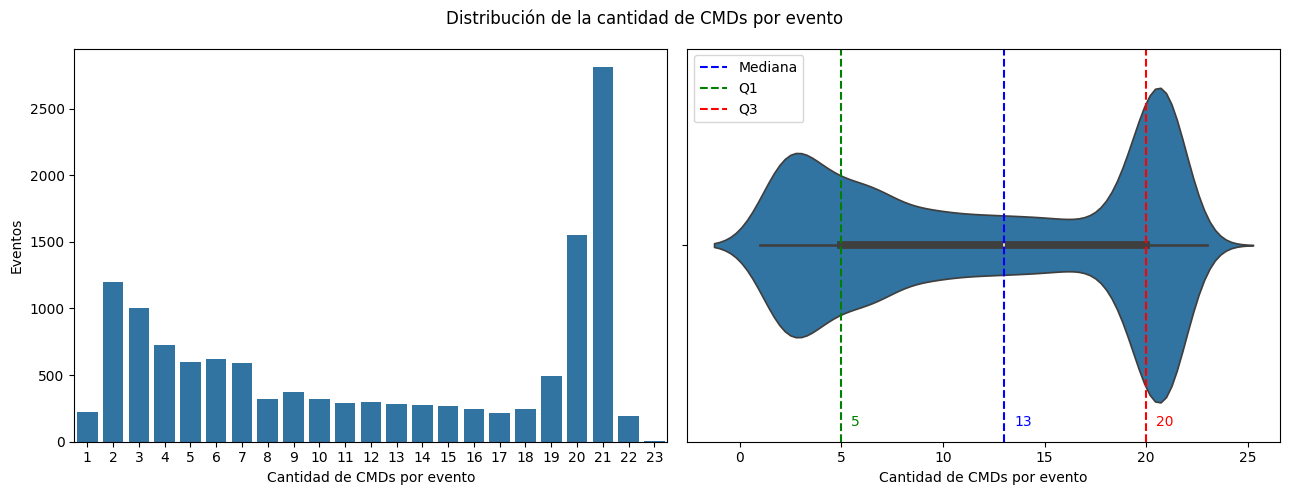

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(13, 5))
sns.barplot(
    data=data.groupby("event_id").size().value_counts().sort_index().reset_index(name="Frequency").rename(columns={"index": "CMDs"}),
    x="CMDs",
    y="Frequency",
    ax=ax[0],
)
ax[0].set_xlabel("Cantidad de CMDs por evento")
ax[0].set_ylabel("Eventos")

sns.violinplot(
    data=data.groupby("event_id").size().reset_index(name="CMDs"),
    x="CMDs",
    ax=ax[1]
)
ax[1].set_xlabel("Cantidad de CMDs por evento")
ax[1].axvline(data.groupby("event_id").size().median(), color='blue', linestyle='--', label='Mediana')
ax[1].text(data.groupby("event_id").size().median() + 0.5, 0.45, f"{data.groupby('event_id').size().median():0.0f}", color='blue', va='center')
ax[1].axvline(data.groupby("event_id").size().quantile(0.25), color='green', linestyle='--', label='Q1')
ax[1].text(data.groupby("event_id").size().quantile(0.25) + 0.5, 0.45, f"{data.groupby('event_id').size().quantile(0.25):0.0f}", color='green', va='center')
ax[1].axvline(data.groupby("event_id").size().quantile(0.75), color='red', linestyle='--', label='Q3')
ax[1].text(data.groupby("event_id").size().quantile(0.75) + 0.5, 0.45, f"{data.groupby('event_id').size().quantile(0.75):0.0f}", color='red', va='center')
ax[1].legend()
plt.suptitle("Distribución de la cantidad de CMDs por evento")
plt.tight_layout()
plt.show()

La distribución de la cantidad de CDMs por evento se aleja significativamente de una distribución normal. En particular, se observa:

- Multimodalidad.
- Acumulación importante tanto en valores bajos (≈ 2–6 CDMs) como en valores altos (≈ 20–21 CDMs).
- Asimetría y fuerte dispersión (Q1 ≈ 5, Mediana ≈ 13, Q3 ≈ 20).

1. No homogeneidad del proceso generador de datos
   
   La no normalidad sugiere que los eventos de conjunción no constituyen una población homogénea. Es probable que existan distintos regímenes
   
   - Eventos descartados rápidamente (pocos CDMs).
   - Eventos de seguimiento intermedio.
   - Eventos monitoreados intensamente (muchos CDMs).

  Esto indica una estructura subyacente más compleja que un proceso aleatorio simple.

2. Estructura jerárquica del dataset
   
   Cada event_id contiene múltiples CDMs asociados. Por lo tanto:

   - Las observaciones no son independientes (no IID).
   - Existe dependencia intra-evento.
   - El dataset posee una estructura jerárquica clara: evento -> múltiples actualizaciones.

   Esto debe tenerse en cuenta en cualquier modelado posterior.

3. Posible influencia operacional
   
   La cantidad de CDMs por evento no necesariamente depende únicamente del riesgo físico calculado. Puede estar influenciada por factores como:

   - Prioridad o criticidad de la misión afectada.
   - Interés estratégico del satélite.
   - Disponibilidad y calidad de observaciones.
   - Políticas internas de seguimiento.

   Por lo tanto, el número de CDMs podría reflejar no solo la dinámica orbital y la probabilidad de colisión, sino también decisiones operacionales o humanas.

4. Implicancias metodológicas
   
   - No puede asumirse que “más CDMs” implique necesariamente “mayor riesgo”.
   - La variable cantidad de CDMs podría estar parcialmente desacoplada de la física del evento.
   - El proceso generador combina componentes físicos y operacionales (socio-técnicos).

   En consecuencia, cualquier análisis predictivo o explicativo debe considerar que el dataset no representa únicamente un sistema físico, sino un sistema físico-operacional.

**Conclusión**

La distribución observada sugiere que el número de CDMs por evento es una variable estructuralmente informativa, pero potencialmente sesgada por factores operacionales. Esto refuerza la necesidad de distinguir entre:

- Dinámica física del riesgo.
- Decisiones de seguimiento y actualización.

Comprender esta diferencia es clave para interpretar correctamente los resultados del modelado del risk y evitar conclusiones erróneas sobre el proceso generador de los datos.

Misión 5:
  Cantidad de eventos: 2253
  Cantidad de CMDs: 28649
  CMDs por evento: 12.72
  Estadísticas de CMDs por evento:
count    2253.000000
mean       12.715934
std         7.388490
min         1.000000
25%         5.000000
50%        14.000000
75%        20.000000
max        22.000000
dtype: float64


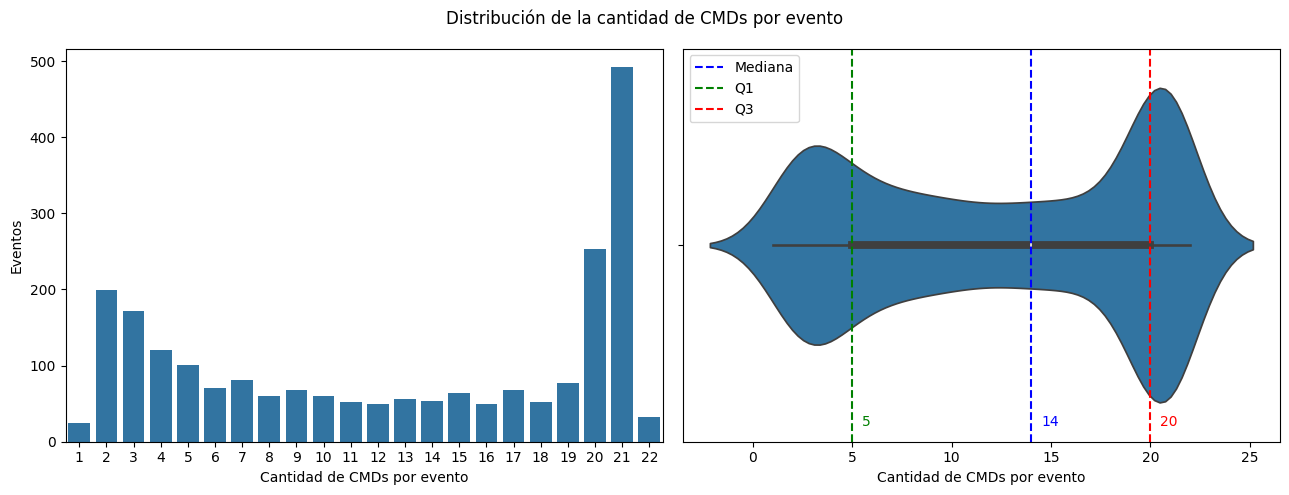

Misión 15:
  Cantidad de eventos: 1769
  Cantidad de CMDs: 24746
  CMDs por evento: 13.99
  Estadísticas de CMDs por evento:
count    1769.000000
mean       13.988694
std         7.463705
min         1.000000
25%         6.000000
50%        19.000000
75%        21.000000
max        22.000000
dtype: float64


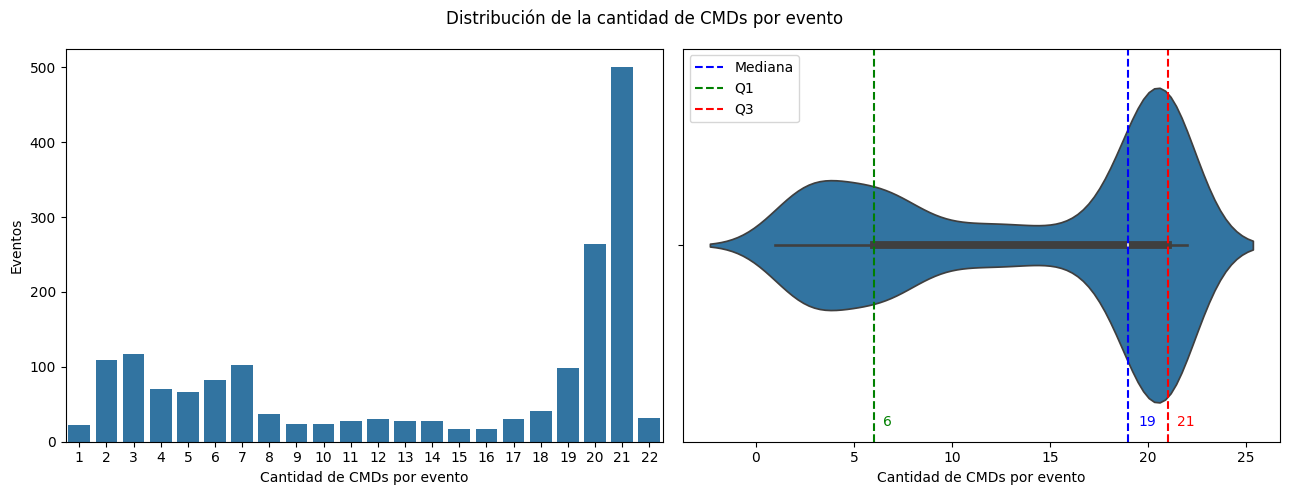

Misión 1:
  Cantidad de eventos: 2322
  Cantidad de CMDs: 24072
  CMDs por evento: 10.37
  Estadísticas de CMDs por evento:
count    2322.000000
mean       10.366925
std         7.054151
min         1.000000
25%         4.000000
50%         9.000000
75%        17.000000
max        22.000000
dtype: float64


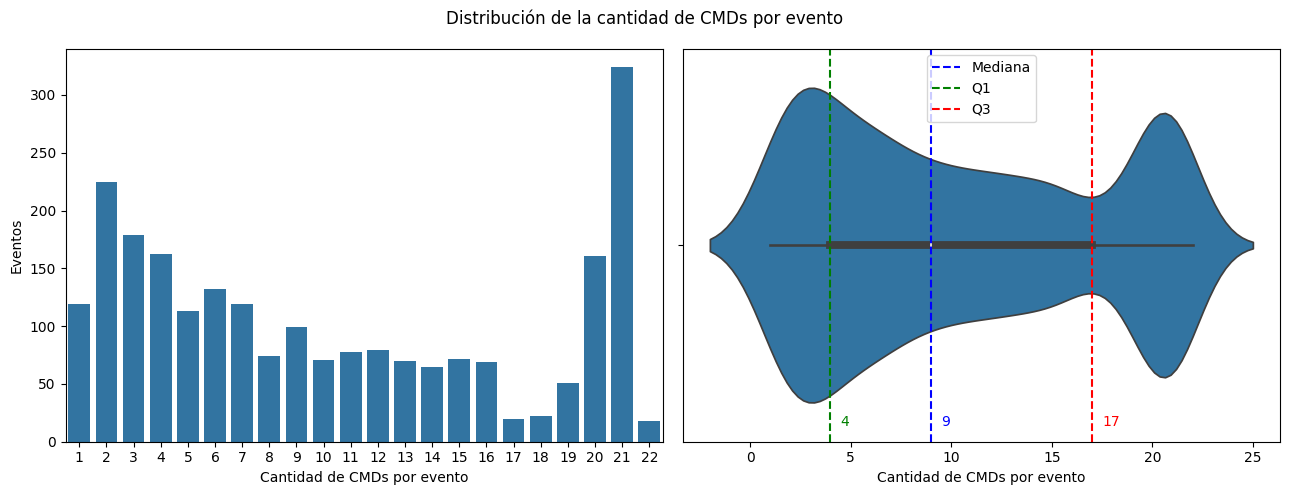

Misión 2:
  Cantidad de eventos: 1497
  Cantidad de CMDs: 23730
  CMDs por evento: 15.85
  Estadísticas de CMDs por evento:
count    1497.000000
mean       15.851703
std         6.642669
min         1.000000
25%        11.000000
50%        20.000000
75%        21.000000
max        22.000000
dtype: float64


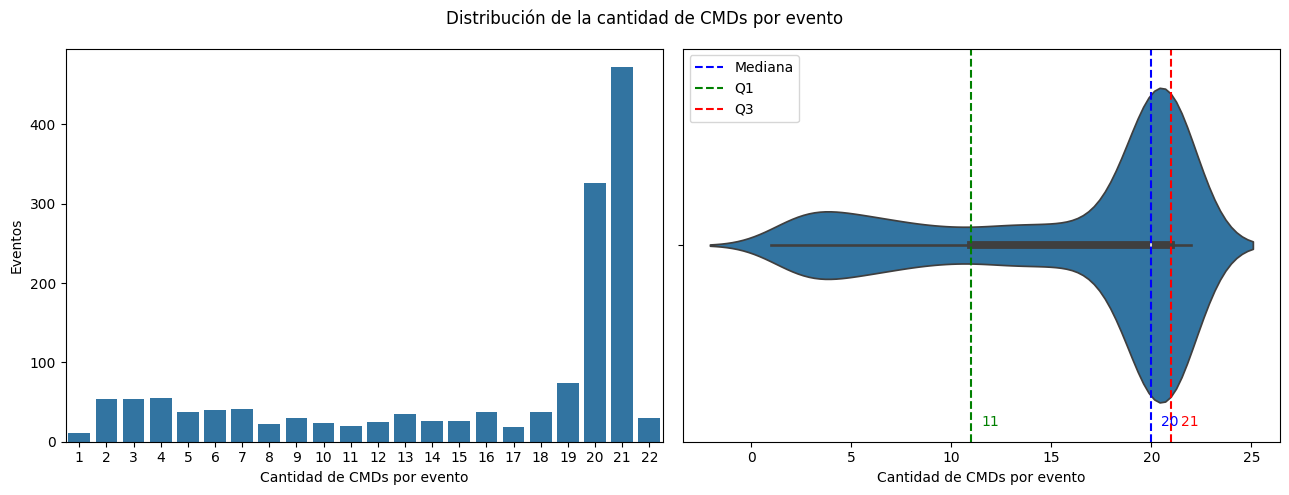

Misión 7:
  Cantidad de eventos: 1765
  Cantidad de CMDs: 20785
  CMDs por evento: 11.78
  Estadísticas de CMDs por evento:
count    1765.000000
mean       11.776204
std         7.215763
min         1.000000
25%         5.000000
50%        11.000000
75%        20.000000
max        22.000000
dtype: float64


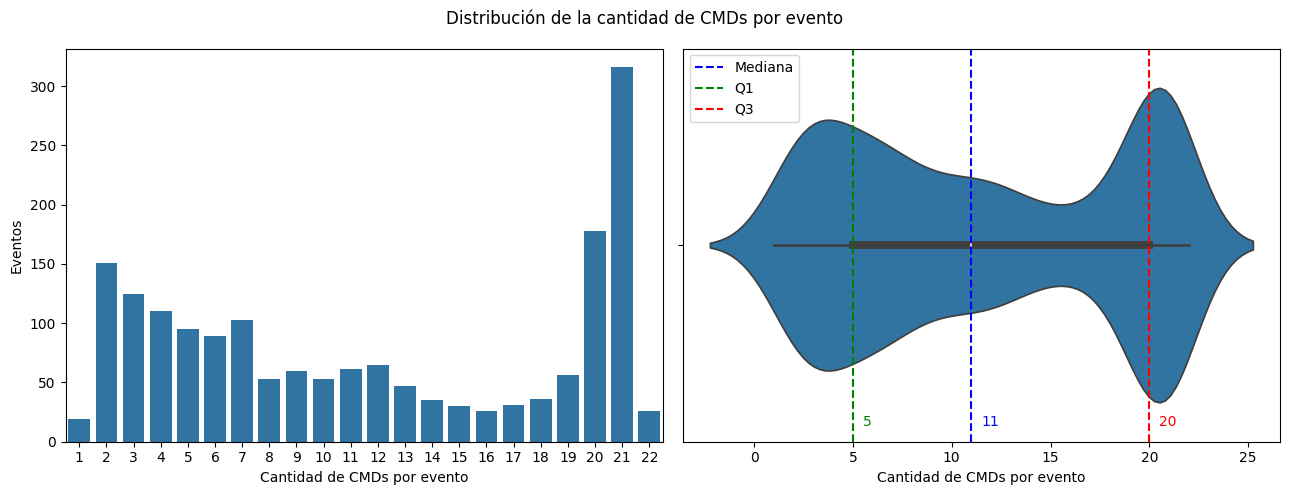

Misión 19:
  Cantidad de eventos: 671
  Cantidad de CMDs: 10429
  CMDs por evento: 15.54
  Estadísticas de CMDs por evento:
count    671.000000
mean      15.542474
std        6.815538
min        1.000000
25%       10.000000
50%       20.000000
75%       21.000000
max       22.000000
dtype: float64


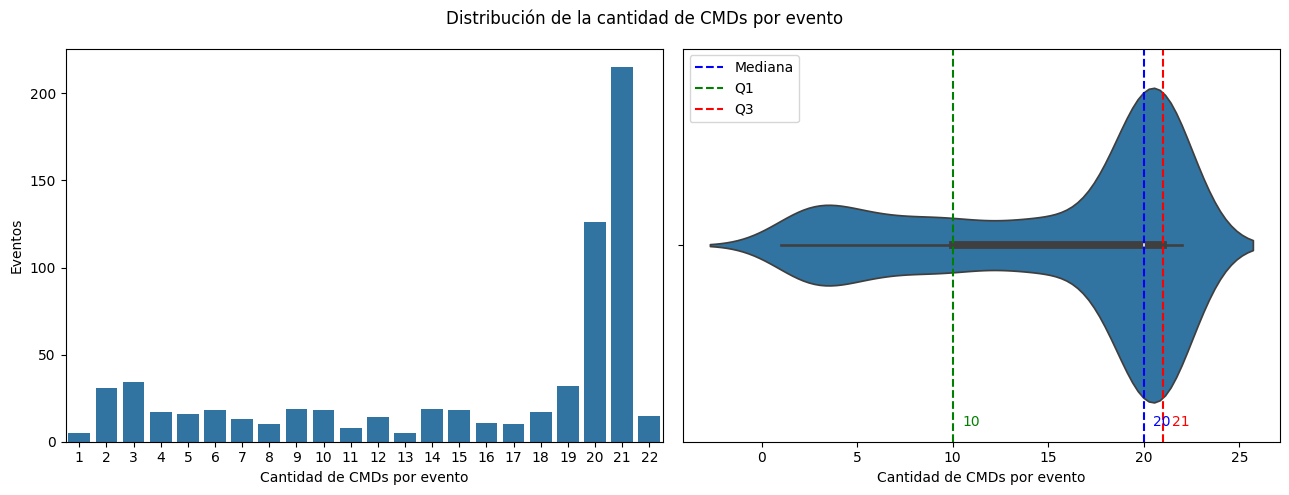

Misión 6:
  Cantidad de eventos: 1108
  Cantidad de CMDs: 7816
  CMDs por evento: 7.05
  Estadísticas de CMDs por evento:
count    1108.000000
mean        7.054152
std         6.461529
min         1.000000
25%         3.000000
50%         4.000000
75%         8.000000
max        23.000000
dtype: float64


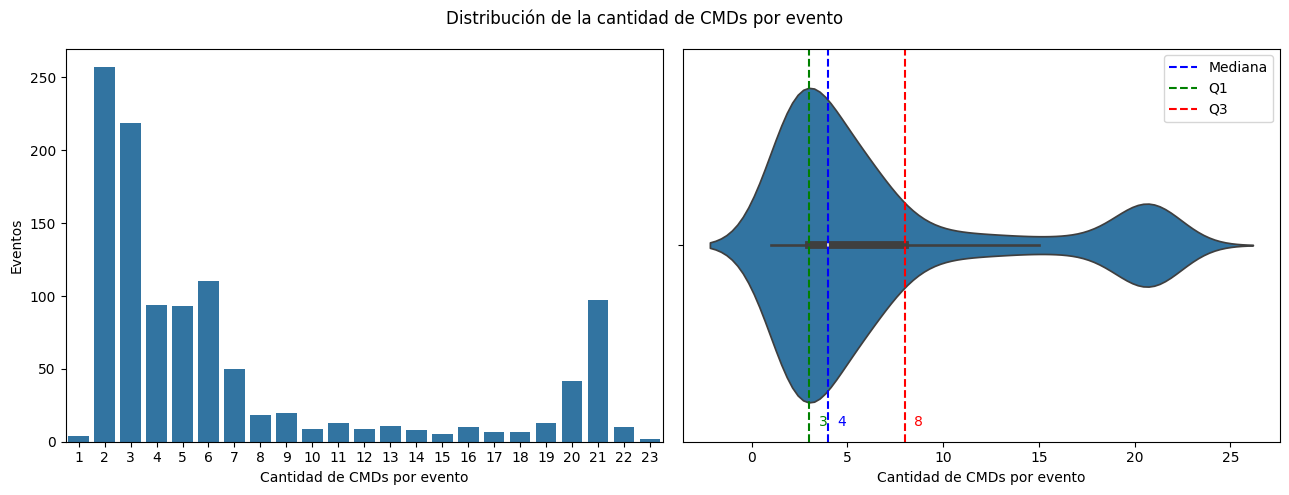

Misión 3:
  Cantidad de eventos: 486
  Cantidad de CMDs: 7103
  CMDs por evento: 14.62
  Estadísticas de CMDs por evento:
count    486.000000
mean      14.615226
std        7.237224
min        1.000000
25%        8.000000
50%       19.000000
75%       21.000000
max       22.000000
dtype: float64


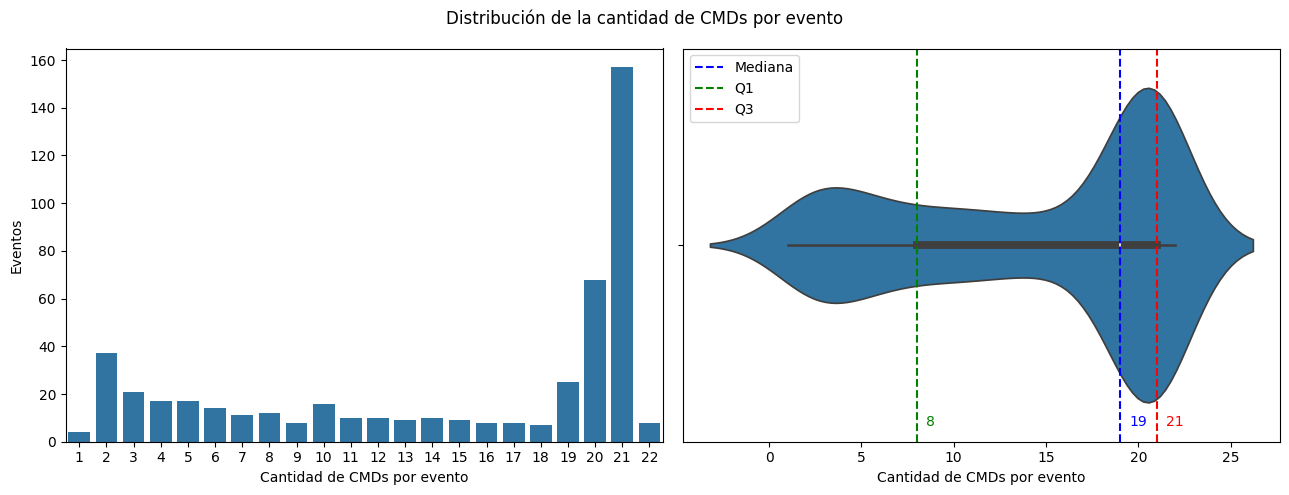

Misión 9:
  Cantidad de eventos: 410
  Cantidad de CMDs: 5644
  CMDs por evento: 13.77
  Estadísticas de CMDs por evento:
count    410.000000
mean      13.765854
std        6.910451
min        2.000000
25%        7.000000
50%       15.000000
75%       20.000000
max       23.000000
dtype: float64


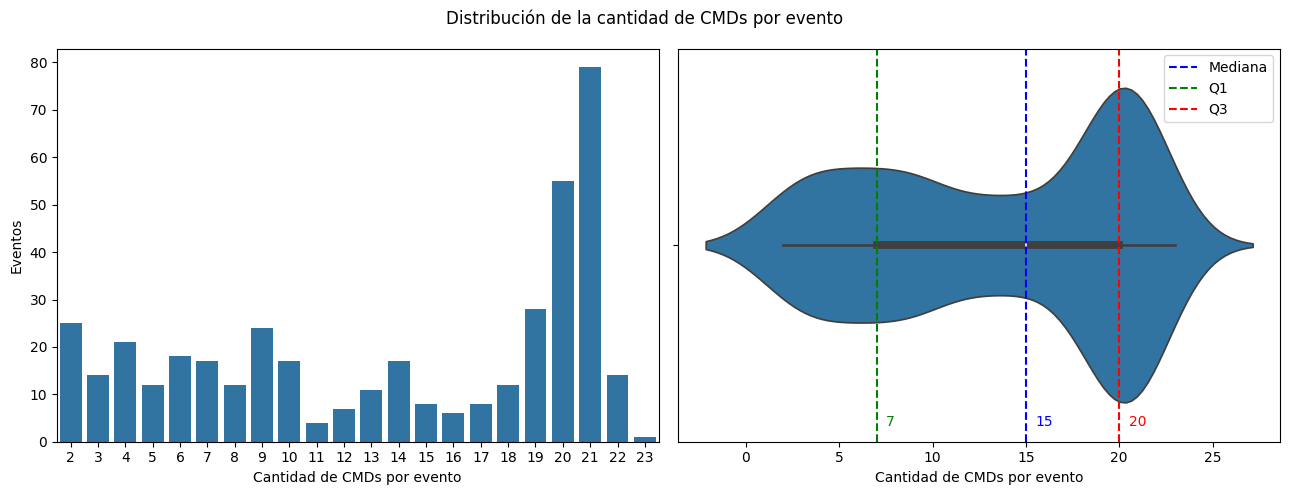

Misión 4:
  Cantidad de eventos: 265
  Cantidad de CMDs: 4245
  CMDs por evento: 16.02
  Estadísticas de CMDs por evento:
count    265.000000
mean      16.018868
std        6.544980
min        2.000000
25%       10.000000
50%       20.000000
75%       21.000000
max       22.000000
dtype: float64


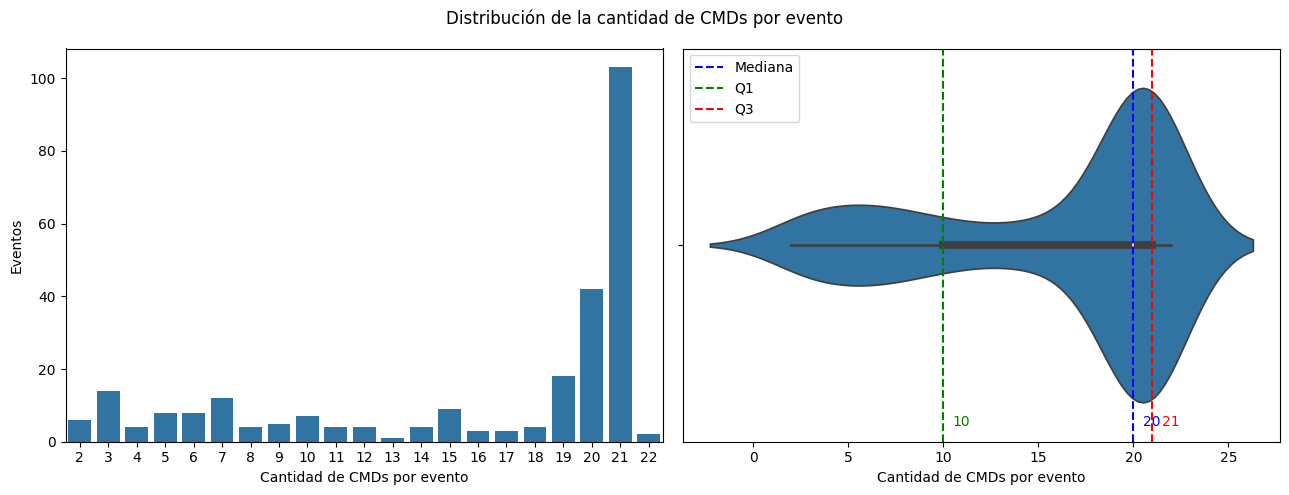

Misión 18:
  Cantidad de eventos: 120
  Cantidad de CMDs: 1770
  CMDs por evento: 14.75
  Estadísticas de CMDs por evento:
count    120.000000
mean      14.750000
std        6.887145
min        2.000000
25%        9.000000
50%       19.000000
75%       21.000000
max       22.000000
dtype: float64


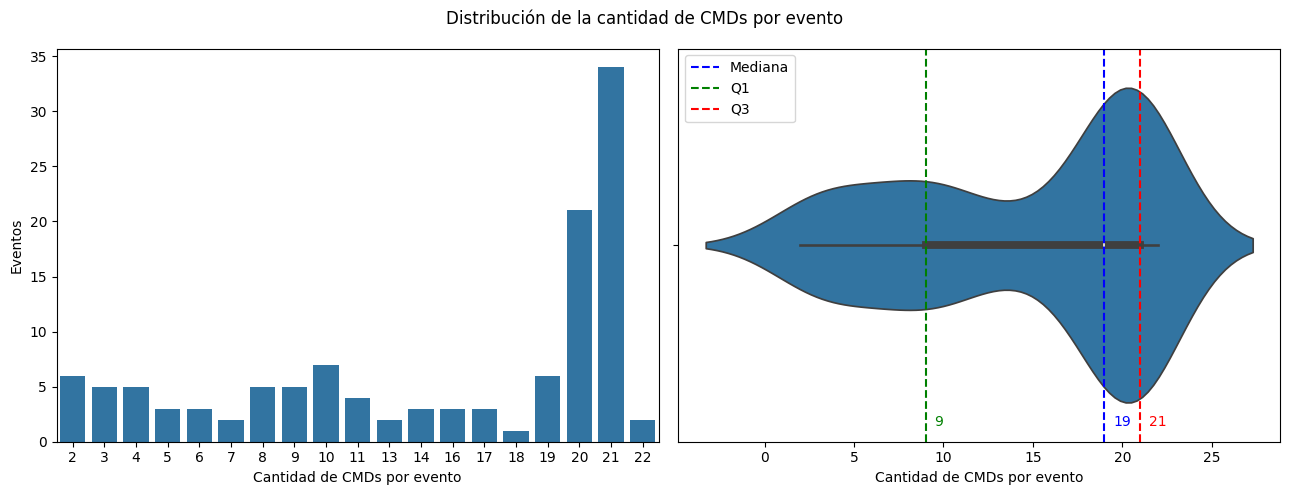

Misión 16:
  Cantidad de eventos: 115
  Cantidad de CMDs: 1149
  CMDs por evento: 9.99
  Estadísticas de CMDs por evento:
count    115.000000
mean       9.991304
std        6.816512
min        2.000000
25%        4.000000
50%        8.000000
75%       17.000000
max       22.000000
dtype: float64


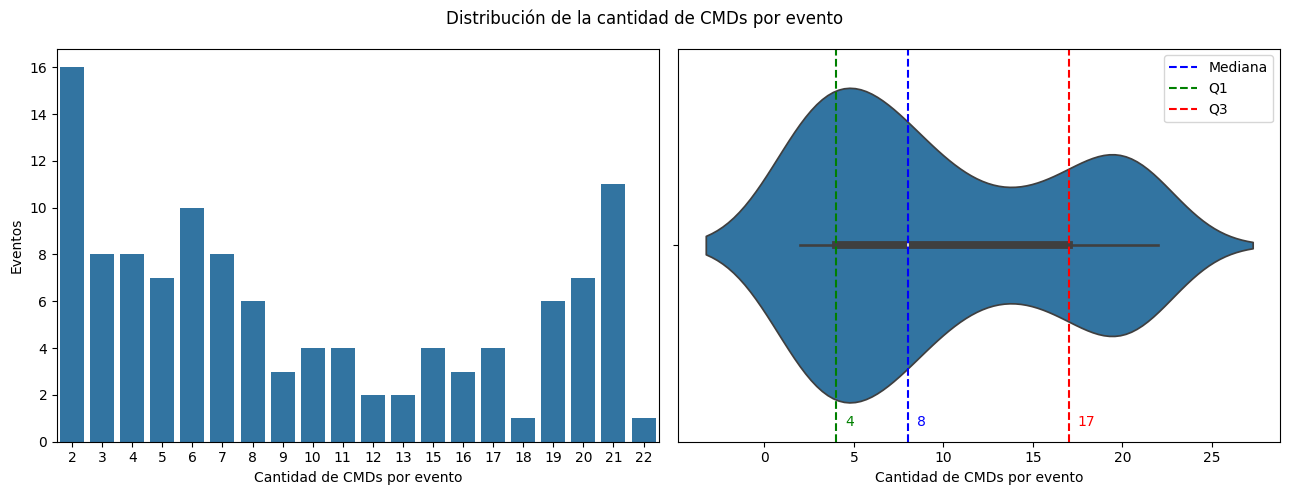

Misión 10:
  Cantidad de eventos: 163
  Cantidad de CMDs: 996
  CMDs por evento: 6.11
  Estadísticas de CMDs por evento:
count    163.000000
mean       6.110429
std        5.478359
min        1.000000
25%        2.000000
50%        4.000000
75%        7.000000
max       21.000000
dtype: float64


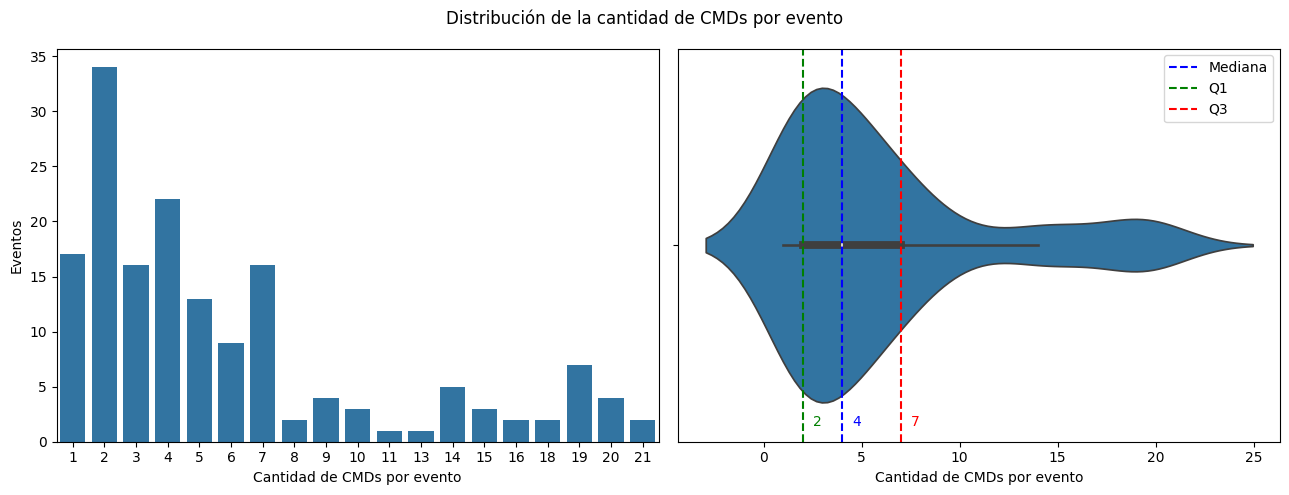

Misión 20:
  Cantidad de eventos: 70
  Cantidad de CMDs: 419
  CMDs por evento: 5.99
  Estadísticas de CMDs por evento:
count    70.000000
mean      5.985714
std       5.187758
min       2.000000
25%       2.000000
50%       4.000000
75%       7.000000
max      21.000000
dtype: float64


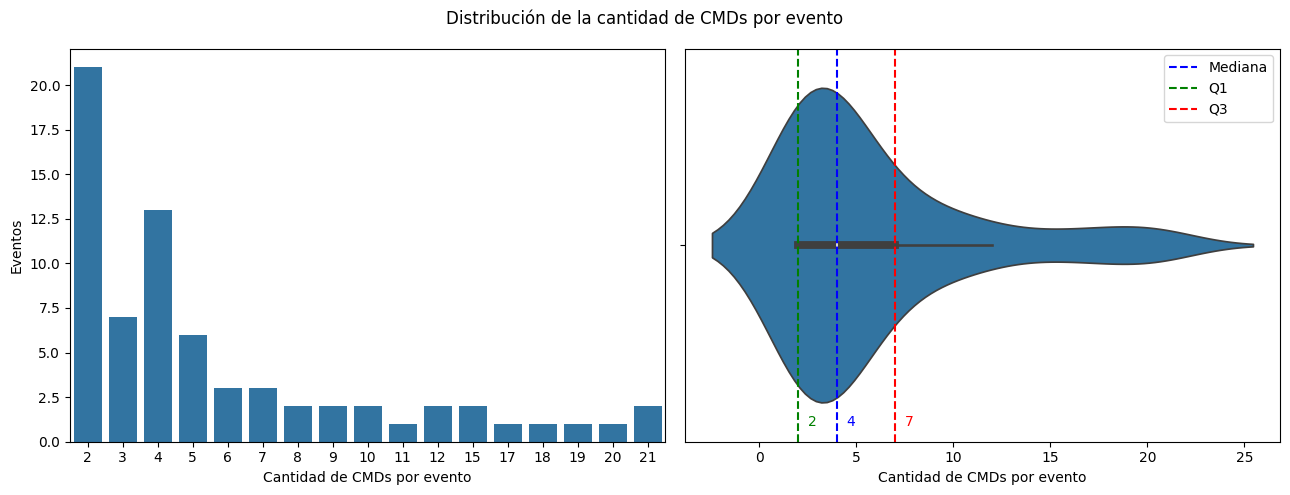

Misión 22:
  Cantidad de eventos: 43
  Cantidad de CMDs: 355
  CMDs por evento: 8.26
  Estadísticas de CMDs por evento:
count    43.000000
mean      8.255814
std       5.960557
min       2.000000
25%       3.000000
50%       6.000000
75%      12.500000
max      21.000000
dtype: float64


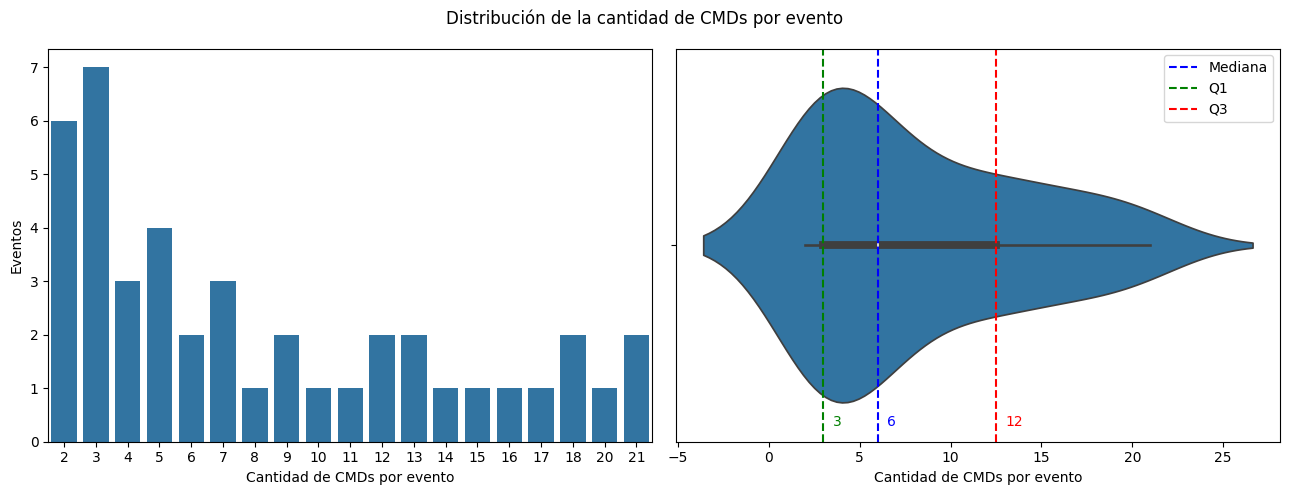

Misión 24:
  Cantidad de eventos: 40
  Cantidad de CMDs: 317
  CMDs por evento: 7.92
  Estadísticas de CMDs por evento:
count    40.000000
mean      7.925000
std       5.880814
min       2.000000
25%       3.000000
50%       6.000000
75%      11.500000
max      21.000000
dtype: float64


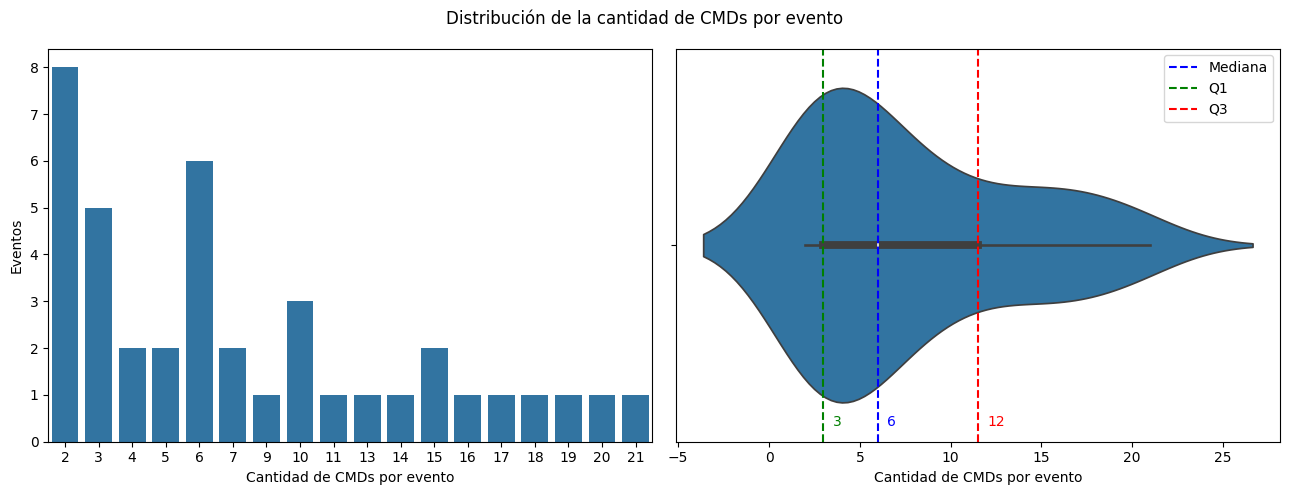

Misión 23:
  Cantidad de eventos: 38
  Cantidad de CMDs: 258
  CMDs por evento: 6.79
  Estadísticas de CMDs por evento:
count    38.000000
mean      6.789474
std       5.882442
min       2.000000
25%       3.000000
50%       4.000000
75%       8.750000
max      21.000000
dtype: float64


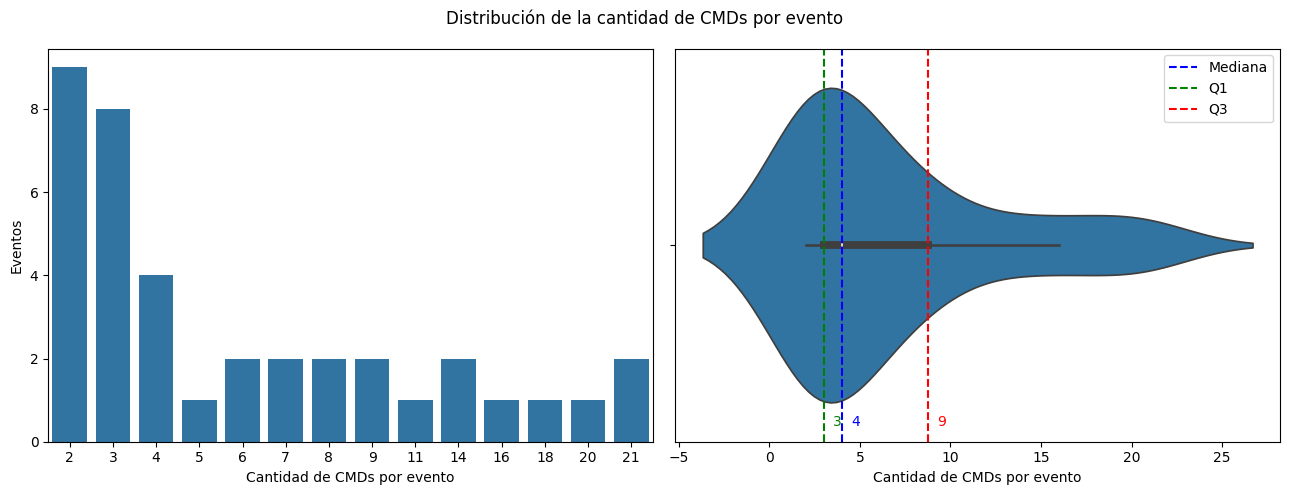

Misión 14:
  Cantidad de eventos: 11
  Cantidad de CMDs: 101
  CMDs por evento: 9.18
  Estadísticas de CMDs por evento:
count    11.000000
mean      9.181818
std       7.110811
min       2.000000
25%       4.500000
50%       7.000000
75%      12.000000
max      22.000000
dtype: float64


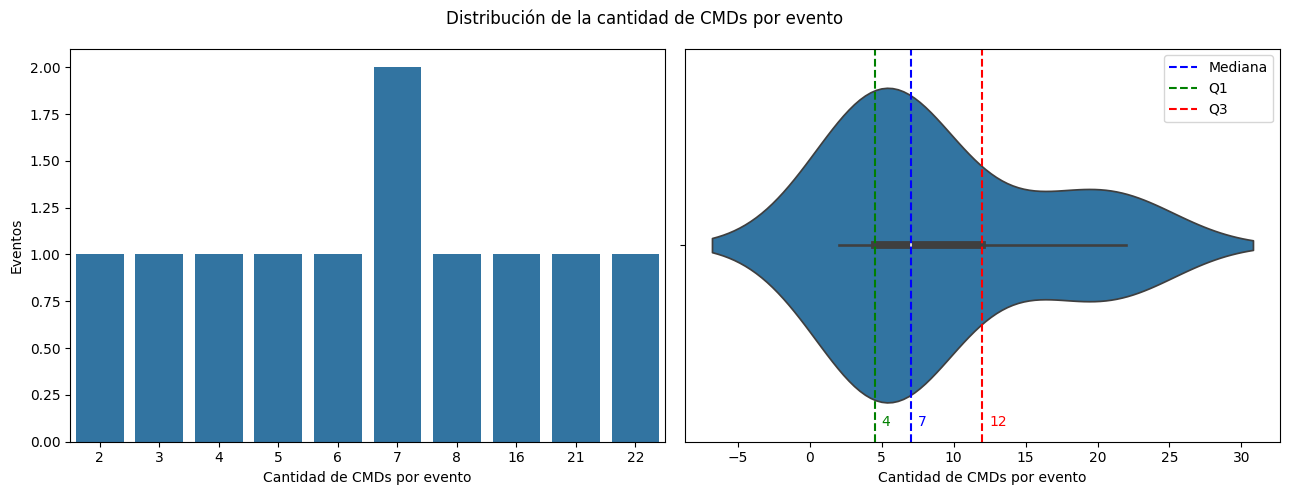

Misión 13:
  Cantidad de eventos: 8
  Cantidad de CMDs: 50
  CMDs por evento: 6.25
  Estadísticas de CMDs por evento:
count     8.000000
mean      6.250000
std       4.920801
min       2.000000
25%       2.000000
50%       5.000000
75%       8.250000
max      15.000000
dtype: float64


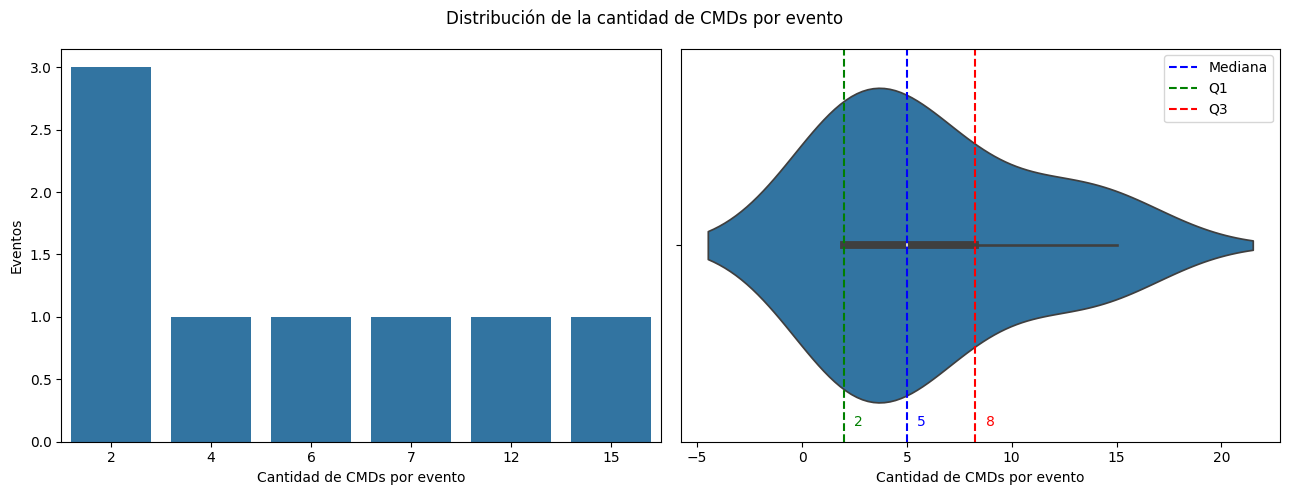

In [106]:
for mission_id in data["mission_id"].value_counts().index.tolist():
    print(f"Misión {mission_id}:")
    df = data[data["mission_id"] == mission_id]
    print(f"  Cantidad de eventos: {df['event_id'].nunique()}")
    print(f"  Cantidad de CMDs: {len(df)}")
    print(f"  CMDs por evento: {len(df) / df['event_id'].nunique():0.2f}")
    print(f"  Estadísticas de CMDs por evento:")
    print(df.groupby("event_id").size().describe())
    fig, ax = plt.subplots(1, 2, figsize=(13, 5))
    sns.barplot(
        data=df.groupby("event_id").size().value_counts().sort_index().reset_index(name="Frequency").rename(columns={"index": "CMDs"}),
        x="CMDs",
        y="Frequency",
        ax=ax[0],
    )
    ax[0].set_xlabel("Cantidad de CMDs por evento")
    ax[0].set_ylabel("Eventos")

    sns.violinplot(
        data=df.groupby("event_id").size().reset_index(name="CMDs"),
        x="CMDs",
        ax=ax[1]
    )
    ax[1].set_xlabel("Cantidad de CMDs por evento")
    ax[1].axvline(df.groupby("event_id").size().median(), color='blue', linestyle='--', label='Mediana')
    ax[1].text(df.groupby("event_id").size().median() + 0.5, 0.45, f"{df.groupby('event_id').size().median():0.0f}", color='blue', va='center')
    ax[1].axvline(df.groupby("event_id").size().quantile(0.25), color='green', linestyle='--', label='Q1')
    ax[1].text(df.groupby("event_id").size().quantile(0.25) + 0.5, 0.45, f"{df.groupby('event_id').size().quantile(0.25):0.0f}", color='green', va='center')
    ax[1].axvline(df.groupby("event_id").size().quantile(0.75), color='red', linestyle='--', label='Q3')
    ax[1].text(df.groupby("event_id").size().quantile(0.75) + 0.5, 0.45, f"{df.groupby('event_id').size().quantile(0.75):0.0f}", color='red', va='center')
    ax[1].legend()
    plt.suptitle("Distribución de la cantidad de CMDs por evento")
    plt.tight_layout()
    plt.show()

A partir del análisis del número de eventos únicos y la cantidad total de CDMs por mission_id, se observan diferencias estructurales significativas entre misiones.

1. Regímenes diferenciados de seguimiento
   
   Al analizar el promedio de CDMs por evento, emergen tres grupos claros:
   
   - Seguimiento intensivo (≈ 14–16 CDMs/evento)
     Ejemplos:
     - Misión 2 → 15.85
     - Misión 4 → 16.02
     - Misión 19 → 15.54
     - Misión 3 → 14.62
     - Misión 18 → 14.75
     - Misión 15 → 13.99
     - Misión 9 → 13.77
   
   Características:
   
   - Medianas cercanas a 19–20 CDMs.
   - Tercer cuartil ≈ 21.
   - Máximos frecuentemente en 22 CDMs.

   Esto sugiere seguimiento prolongado casi sistemático de los eventos.

   - Seguimiento intermedio (≈ 10–13 CDMs/evento)
     Ejemplos:
     - Misión 5 → 12.72
     - Misión 7 → 11.78
     - Misión 1 → 10.37
     - Misión 16 → 9.99

     Aquí se observa:
     
     - Mayor dispersión.
     - Eventos que se cierran antes.
     - Menor acumulación en el máximo de CDMs.

   - Seguimiento bajo (≈ 6–8 CDMs/evento)
     Ejemplos:
     - Misión 6 → 7.05
     - Misión 10 → 6.11
     - Misión 20 → 5.99
     - Misión 23 → 6.79
     - Misión 13 → 6.25

     En estos casos:

     - Muchos eventos se descartan rápidamente.
     - Medianas bajas.
     - Seguimiento corto en general.

2. El seguimiento no parece puramente físico
   
   Las diferencias entre misiones son demasiado marcadas para atribuirlas únicamente a dinámica orbital. Por ejemplo:

   - Misión 2 → 15.85 CDMs/evento
   - Misión 6 → 7.05 CDMs/evento
   
   Esto sugiere la influencia de factores adicionales, tales como:

   - Prioridad estratégica de la misión.
   - Políticas internas de seguimiento.
   - Entorno orbital más o menos congestionado.
   - Diferencias en calidad o disponibilidad de observaciones.
   - Nivel de criticidad del activo espacial.

3. El dataset es jerárquico y no IID

   La estructura real del dataset es multinivel:

   mission_id

   └── event_id

         └── múltiples CDMs
   
   Por lo tanto:
   - Las observaciones no son independientes.
   - Existe dependencia intra-evento.
   - Existe heterogeneidad entre misiones.
   - El proceso generador combina física orbital y decisiones operacionales.
   - Esto tiene implicancias metodológicas importantes para cualquier modelado global.
  
4. Implicancias para el análisis del risk

   El algoritmo físico de cálculo del riesgo puede ser el mismo para todas las misiones. Sin embargo, el proceso de seguimiento claramente no lo es.

   Dado que algunas misiones dominan el volumen total del dataset (por ejemplo, misiones 1, 2, 5, 7 y 15), cualquier modelo entrenado globalmente estará principalmente influenciado por ellas. Por lo tanto:
   - Las conclusiones globales pueden reflejar mayormente la dinámica de las misiones dominantes.
   - Es posible que el mecanismo físico (por ejemplo, dependencia respecto a distancia normalizada por incertidumbre) varíe ligeramente entre misiones.  

5. Pregunta clave abierta
   
   Una cuestión central a investigar es:
   
   _¿Las misiones con mayor cantidad de CDMs por evento presentan también mayores niveles de riesgo máximo?_

   Si existe una correlación fuerte entre:
   - intensidad de seguimiento y
   - riesgo máximo del evento,

   entonces el sistema responde principalmente a la física del riesgo. Si no existe dicha correlación, entonces factores operacionales o políticos podrían estar desempeñando un rol dominante en el seguimiento.

**Conclusión**

El análisis por misión revela que el dataset no solo refleja la dinámica física de conjunciones orbitales, sino también decisiones operacionales diferenciadas entre misiones.

Esto confirma que el sistema subyacente es socio-técnico:

- Componente física (probabilidad de colisión).
- Componente operacional (seguimiento y actualización).
- Estructura jerárquica multinivel.
- Fuerte desbalance entre misiones.

Comprender esta estructura es esencial para interpretar correctamente cualquier análisis del risk y para evitar conclusiones simplistas sobre el proceso generador de los datos
